In [135]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from fase2_funciones import *


df_bd_preprocesada = pd.read_csv('BD/OnlineRetail_Preprocesada.csv', sep=',', encoding = 'unicode_escape')
df_pivot = df_bd_preprocesada['InvoiceDate'].str.split(expand = True)
df_pivot.rename(columns = {0: 'Fecha', 1: 'Hora'}, inplace=True)
df_bd_preprocesada = df_bd_preprocesada.drop(columns =['Unnamed: 0','InvoiceDate'])
df_bd_preprocesada = pd.concat([df_bd_preprocesada,df_pivot], axis = 1)
df_bd_preprocesada['Monto'] = df_bd_preprocesada['UnitPrice'] * df_bd_preprocesada['Quantity']


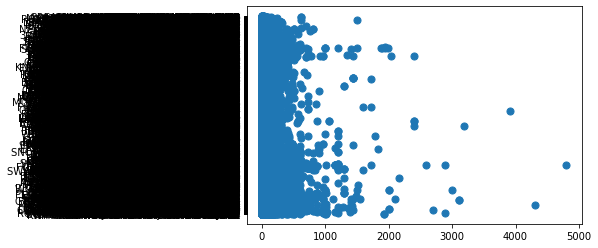

In [139]:
df_bd_preprocesada_new = df_bd_preprocesada[df_bd_preprocesada.Quantity <10000]
plt.scatter(df_bd_preprocesada_new['Quantity'],df_bd_preprocesada_new['Description'],s=50)

In [140]:
df_bd_aux=df_bd_preprocesada_new.drop(['InvoiceNo','StockCode','Description','Country','Fecha','Hora','Monto'],axis=1)
df_bd_Normalizada = (df_bd_aux-df_bd_aux.min())/(df_bd_aux.max()-df_bd_aux.min())
df_bd_Normalizada

,Quantity,UnitPrice,CustomerID
0,0.001042,0.000313,0.926431
1,0.001042,0.000416,0.926431
2,0.001459,0.000338,0.926431
3,0.001042,0.000416,0.926431
4,0.001042,0.000416,0.926431
...,...,...,...
392727,0.002292,0.000104,0.056061
392728,0.001042,0.000258,0.056061
392729,0.000625,0.000510,0.056061
392730,0.000625,0.000510,0.056061


In [141]:
features = list(df_bd_Normalizada.columns)[:]
print(features)

['Quantity', 'UnitPrice', 'CustomerID']


In [142]:
BD_atrib = df_bd_Normalizada[features[:-1]]
BD_clase = df_bd_Normalizada['CustomerID']
X_train, X_test, Y_train, Y_test = train_test_split(BD_atrib,
                                                    BD_clase,
                                                    test_size=0.2,
                                                    random_state =0)


In [143]:
from sklearn.decomposition import PCA #analisis de componentes principales
pca = PCA(n_components=2)
pca.fit(X_train)
X_reducido = pca.transform(X_train)

print("Reduced dataset shape:", X_reducido.shape)

Reduced dataset shape: (314183, 2)


In [144]:
clustering = KMeans(n_clusters = 3, max_iter=300)
clustering.fit(X_train)
centroides = clustering.cluster_centers_
etiquetas = clustering.labels_
y_pred = clustering.predict(X_train)

['Quantity', 'UnitPrice', 'CustomerID']


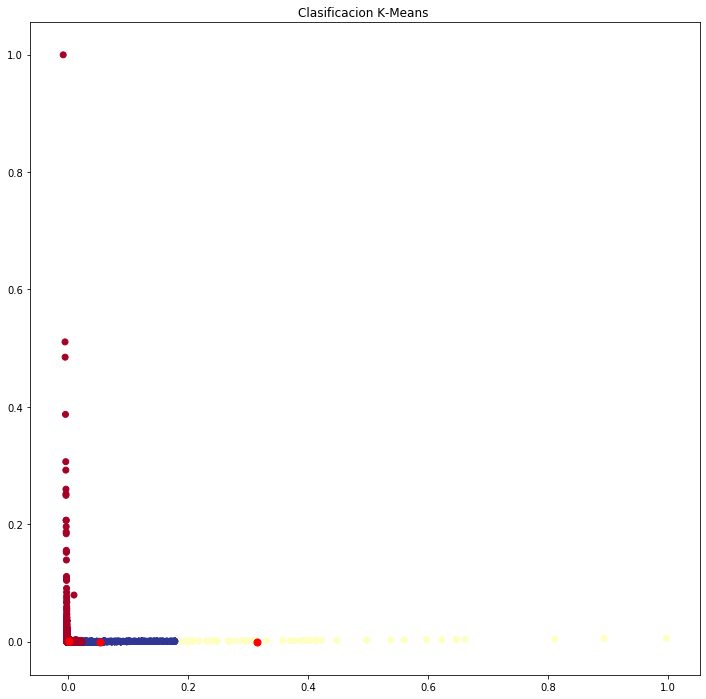

In [145]:
plt.figure(figsize=(12,12))
pl.scatter(X_reducido[:,0], X_reducido[:,1], c=y_pred,
           cmap='RdYlBu'); 
pl.scatter(centroides[:, 0], centroides[:, 1], c='red',s=50)
print(features)
plt.title('Clasificacion K-Means ')
plt.show()

In [146]:
print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            features)))

Meaning of the 2 components:
1.000 x Quantity + -0.006 x UnitPrice
0.006 x Quantity + 1.000 x UnitPrice


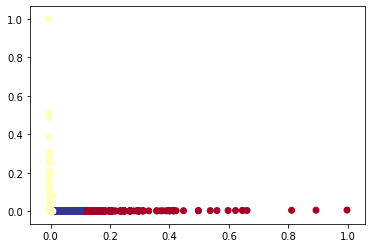

In [147]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=5, init='random') 
# Seteo de parametros y asignacion de numero aleatorio semilla para centros iniciales

k_means.fit(X_train) #minimiza promedio de distancias de datos a los K centros (means) mas cercanos
y_pred = k_means.predict(X_train) #Ojo se aplica a data original

pl.scatter(X_reducido[:, 0], X_reducido[:, 1], c=y_pred,
           cmap='RdYlBu'); #En este caso, la data que originalmente es 4D se representa en 2D por motivo de visualizacion.